# Lab 03

### SUDARSAN HARIDAS
### 300353099

**LOAD THE PYTHON LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

#Import all necessary libraries...

**READ THE DATA**

In [2]:
df = pd.read_csv('salary.csv')

df_copy = df.copy()

#read the data and keep a copy...

In [3]:
df.head()

#view first 5 rows of data...

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
df.info()

#view data types and number of non null entries in each column...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53726 entries, 0 to 53725
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             51108 non-null  float64
 1   workclass       48200 non-null  object 
 2   fnlwgt          51082 non-null  float64
 3   education       51126 non-null  object 
 4   education-num   51090 non-null  float64
 5   marital-status  51116 non-null  object 
 6   occupation      48173 non-null  object 
 7   relationship    51102 non-null  object 
 8   race            51117 non-null  object 
 9   sex             51148 non-null  object 
 10  capital-gain    51083 non-null  float64
 11  capital-loss    51095 non-null  float64
 12  hours-per-week  51234 non-null  float64
 13  native-country  50250 non-null  object 
 14  salary          51114 non-null  object 
dtypes: float64(6), object(9)
memory usage: 6.1+ MB


**DROP UNNEEDED DATA**

In [5]:
df.isnull().sum()

#Check for null values in each column

age               2618
workclass         5526
fnlwgt            2644
education         2600
education-num     2636
marital-status    2610
occupation        5553
relationship      2624
race              2609
sex               2578
capital-gain      2643
capital-loss      2631
hours-per-week    2492
native-country    3476
salary            2612
dtype: int64

In [6]:
df.dropna(inplace = True)

#drop all null values

In [7]:
df = df.reset_index()

df.drop('index', axis = 1, inplace = True)

df.info()

#reset the index after dropping null values...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  float64
 1   workclass       45222 non-null  object 
 2   fnlwgt          45222 non-null  float64
 3   education       45222 non-null  object 
 4   education-num   45222 non-null  float64
 5   marital-status  45222 non-null  object 
 6   occupation      45222 non-null  object 
 7   relationship    45222 non-null  object 
 8   race            45222 non-null  object 
 9   sex             45222 non-null  object 
 10  capital-gain    45222 non-null  float64
 11  capital-loss    45222 non-null  float64
 12  hours-per-week  45222 non-null  float64
 13  native-country  45222 non-null  object 
 14  salary          45222 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.2+ MB


**CREATE NEW COLUMN**

In [8]:
df.salary.value_counts()

#check number of instances of each unique value in salary column...

<=50K     22654
<=50K.    11360
>50K       7508
>50K.      3700
Name: salary, dtype: int64

In [9]:
df.salary = df['salary'].apply(lambda x: x.replace(".",""))

#remove all '.' in salary column...

In [10]:
df.salary.value_counts()

#re-check number of instances of each unique value in salary column...

<=50K    34014
>50K     11208
Name: salary, dtype: int64

In [11]:
df['salary_less50k'] = df['salary'].apply(lambda x: "yes" if x == "<=50K" else "no")

#apply the necessary modification to salary column...

In [12]:
df.salary_less50k.value_counts()

#re-check number of instances of each unique value in salary column...

yes    34014
no     11208
Name: salary_less50k, dtype: int64

In [13]:
df.drop('salary', axis = 1, inplace = True)

#drop salary column as modified new column has been created...

**MODIFY COLUMN NAMES AND CATEGORICAL CONTENT**

In [14]:
df.columns = df.columns.str.replace("-","_")

#replace all hiphens with underscores in column names...

In [15]:
df.workclass = df['workclass'].apply(lambda x: x.replace("-","_"))
df.education = df['education'].apply(lambda x: x.replace("-","_"))
df.marital_status = df['marital_status'].apply(lambda x: x.replace("-","_"))
df.occupation = df['occupation'].apply(lambda x: x.replace("-","_"))
df.relationship = df['relationship'].apply(lambda x: x.replace("-","_"))
df.race = df['race'].apply(lambda x: x.replace("-","_"))
df.sex = df['sex'].apply(lambda x: x.replace("-","_"))
df.native_country = df['native_country'].apply(lambda x: x.replace("-","_"))

#replace all categorical columns with underscores

#df = df.apply(lambda x: x.replace(" ","_") if x.dtype == "object" else x) -- not working

In [16]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary_less50k
0,39.0,State_gov,77516.0,Bachelors,13.0,Never_married,Adm_clerical,Not_in_family,White,Male,2174.0,0.0,40.0,United_States,yes
1,50.0,Self_emp_not_inc,83311.0,Bachelors,13.0,Married_civ_spouse,Exec_managerial,Husband,White,Male,0.0,0.0,13.0,United_States,yes
2,38.0,Private,215646.0,HS_grad,9.0,Divorced,Handlers_cleaners,Not_in_family,White,Male,0.0,0.0,40.0,United_States,yes
3,53.0,Private,234721.0,11th,7.0,Married_civ_spouse,Handlers_cleaners,Husband,Black,Male,0.0,0.0,40.0,United_States,yes
4,28.0,Private,338409.0,Bachelors,13.0,Married_civ_spouse,Prof_specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,yes


**REDUCE NUMBER OF UNIQUE VALUES**

In [17]:
df.native_country.value_counts()

#check unique values in native country column...

United_States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto_Rico                     175
Canada                          163
El_Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican_Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [18]:
df.native_country = df.native_country.apply(lambda x: x if x == "United_States" else "Other_country")

#perform necessary modification in native country column...

In [19]:
df.native_country.value_counts()

#re-check unique values in native country column...

United_States    41292
Other_country     3930
Name: native_country, dtype: int64

**DROP COLUMNS**

In [20]:
df.drop(['capital_loss','capital_gain'], axis = 1, inplace = True)

#drop the mentioned columns...

**CREATE DUMMY VALUES FOR DATAFRAME**

In [21]:
df_dummies = pd.get_dummies(df, drop_first = True)

#create dummy columns for all the categorical columns in the data frame...
#drop the first columns to avoid overfitting...

In [22]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,salary_less50k
0,39.0,State_gov,77516.0,Bachelors,13.0,Never_married,Adm_clerical,Not_in_family,White,Male,40.0,United_States,yes
1,50.0,Self_emp_not_inc,83311.0,Bachelors,13.0,Married_civ_spouse,Exec_managerial,Husband,White,Male,13.0,United_States,yes
2,38.0,Private,215646.0,HS_grad,9.0,Divorced,Handlers_cleaners,Not_in_family,White,Male,40.0,United_States,yes
3,53.0,Private,234721.0,11th,7.0,Married_civ_spouse,Handlers_cleaners,Husband,Black,Male,40.0,United_States,yes
4,28.0,Private,338409.0,Bachelors,13.0,Married_civ_spouse,Prof_specialty,Wife,Black,Female,40.0,Other_country,yes


In [23]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 56 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   45222 non-null  float64
 1   fnlwgt                                45222 non-null  float64
 2   education_num                         45222 non-null  float64
 3   hours_per_week                        45222 non-null  float64
 4   workclass_Local_gov                   45222 non-null  uint8  
 5   workclass_Private                     45222 non-null  uint8  
 6   workclass_Self_emp_inc                45222 non-null  uint8  
 7   workclass_Self_emp_not_inc            45222 non-null  uint8  
 8   workclass_State_gov                   45222 non-null  uint8  
 9   workclass_Without_pay                 45222 non-null  uint8  
 10  education_11th                        45222 non-null  uint8  
 11  education_12th 

In [24]:
df_dummies.head()

,age,fnlwgt,education_num,hours_per_week,workclass_Local_gov,workclass_Private,workclass_Self_emp_inc,workclass_Self_emp_not_inc,workclass_State_gov,workclass_Without_pay,...,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_Black,race_Other,race_White,sex_Male,native_country_United_States,salary_less50k_yes
0,39.0,77516.0,13.0,40.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
1,50.0,83311.0,13.0,13.0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2,38.0,215646.0,9.0,40.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
3,53.0,234721.0,7.0,40.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
4,28.0,338409.0,13.0,40.0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


**GRID SEARCH WITH CROSS VALIDATION**

In [25]:
target = df_dummies.salary_less50k_yes

features = df_dummies.drop('salary_less50k_yes', axis = 1)

#separate the features and target variable...

In [26]:
selection_method = SelectFromModel( estimator = LogisticRegression( max_iter = 1000))

selection_method.fit(features, target)

#model to selects features based on significance towards target variable...

SelectFromModel(estimator=LogisticRegression(max_iter=1000))

In [27]:
selected_features = selection_method.transform(features)

selected_features.shape

#the selection method has selected  features...

(45222, 1)

In [28]:
std_scaler = StandardScaler()

#scaling function to scale the data...

In [29]:
classifier_options = {'kernel': ['linear', 'rbf'], 'gamma': [1, 0.1, 0.01], 'C': [1,10,50]}

x_train, x_test, y_train, y_test = train_test_split(selected_features, target, test_size = 0.50, random_state = 42)

x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

#list the necessary hyperparameters as a dictionary to feed to the gridsearch model...
#split the training and test data (half size training data to reduce compute time)...
#scale the features...

In [30]:
grid_cv_model = GridSearchCV( SVC(random_state = 42), classifier_options,
                             scoring = 'accuracy', n_jobs = -1, cv = 3)

grid_cv_model.fit(x_train, y_train)


#create the SVC model and fit it...

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10, 50], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [31]:
print('Hyperparameters of best model:', grid_cv_model.best_params_)

#printing hyperparameters used in the best performing model

Hyperparameters of best model: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [32]:
best_svc_model = grid_cv_model.best_estimator_

y_pred = best_svc_model.predict(x_test)

#predicting class using the best model...

In [33]:
print(confusion_matrix(y_test, y_pred))

#prints the confusion matrix
##TruePositive   FalsePositive
##FalseNegative  TrueNegative

[[    0  5598]
 [    0 17013]]


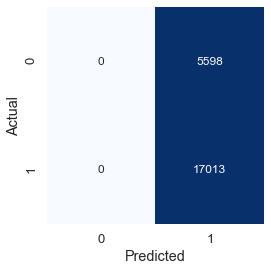

In [34]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=np.unique(y_test), index = np.unique(y_test))

conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, annot = True,annot_kws = {"size": 12}, cbar = False,
          vmax = 500, square = True, fmt = "d", cmap = "Blues")

#TP FP
#FN TN

In [35]:
print(classification_report(y_test, y_pred, target_names = ['Salary more than 50k', 'Salary less than 50k'], 
                            zero_division = 0.0))

#prints the classification report
#0 --> salary more than 50k 
#1 --> salary less than 50k

                      precision    recall  f1-score   support

Salary more than 50k       0.00      0.00      0.00      5598
Salary less than 50k       0.75      1.00      0.86     17013

            accuracy                           0.75     22611
           macro avg       0.38      0.50      0.43     22611
        weighted avg       0.57      0.75      0.65     22611



- Precision --> TP/(TP + FP) --> how many positives predicted that were actually positive...

(i.e) how many out of the people predicted to have a salary less than 50k 
actually have a salary less than 50k



- Recall --> TP/(TP + FN) --> how many positive values were actually predicted to be positive...

(i.e) how many people who actually have salary less than 50k were predicted 
to have salary less than 50k

In [36]:
df_dummies.salary_less50k_yes.value_counts()

1    34014
0    11208
Name: salary_less50k_yes, dtype: int64

**Interpretation**

Because of compute power restrictions, we train the model with only **50% of the data**. The model predicts everybody to have a salary less than 50k. This causes the recall of salary less than 50k to be 1.
The data also has majority people having salary less than 50k, this might be why the model tends to predict salary less than 50k only...